# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

# DATA  ACQUISITION

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# ANALYSING DATA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.shape

(1025, 14)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# RENAMING COLUMNS

In [8]:
data.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholestrol','fbs':'fasting_blood_pressure','restecg':'resting_electrocardiographic_results','thalach':'maximum_heart_rate','exang':'exercise_induced_agina','ca':'coronary_artery_calcium','thal':'thalassemia'},inplace=True)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EXPLORATORY   DATA     ANALYSIS

Text(0.5, 1.0, 'target value counts')

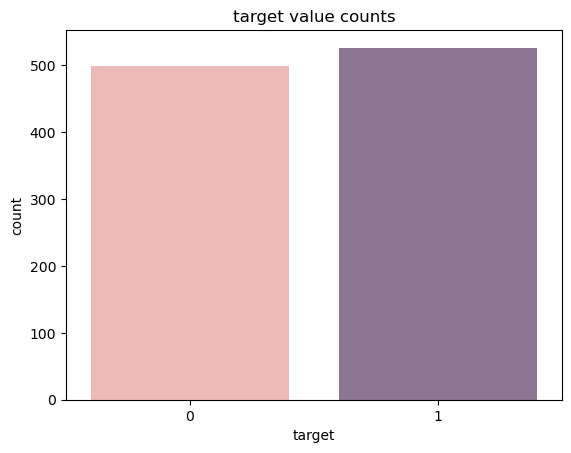

In [9]:
colours=["#f7b2b0","#8f7198","#003f5c"]
sns.countplot(x=data['target'],palette=colours)
plt.title('target value counts')

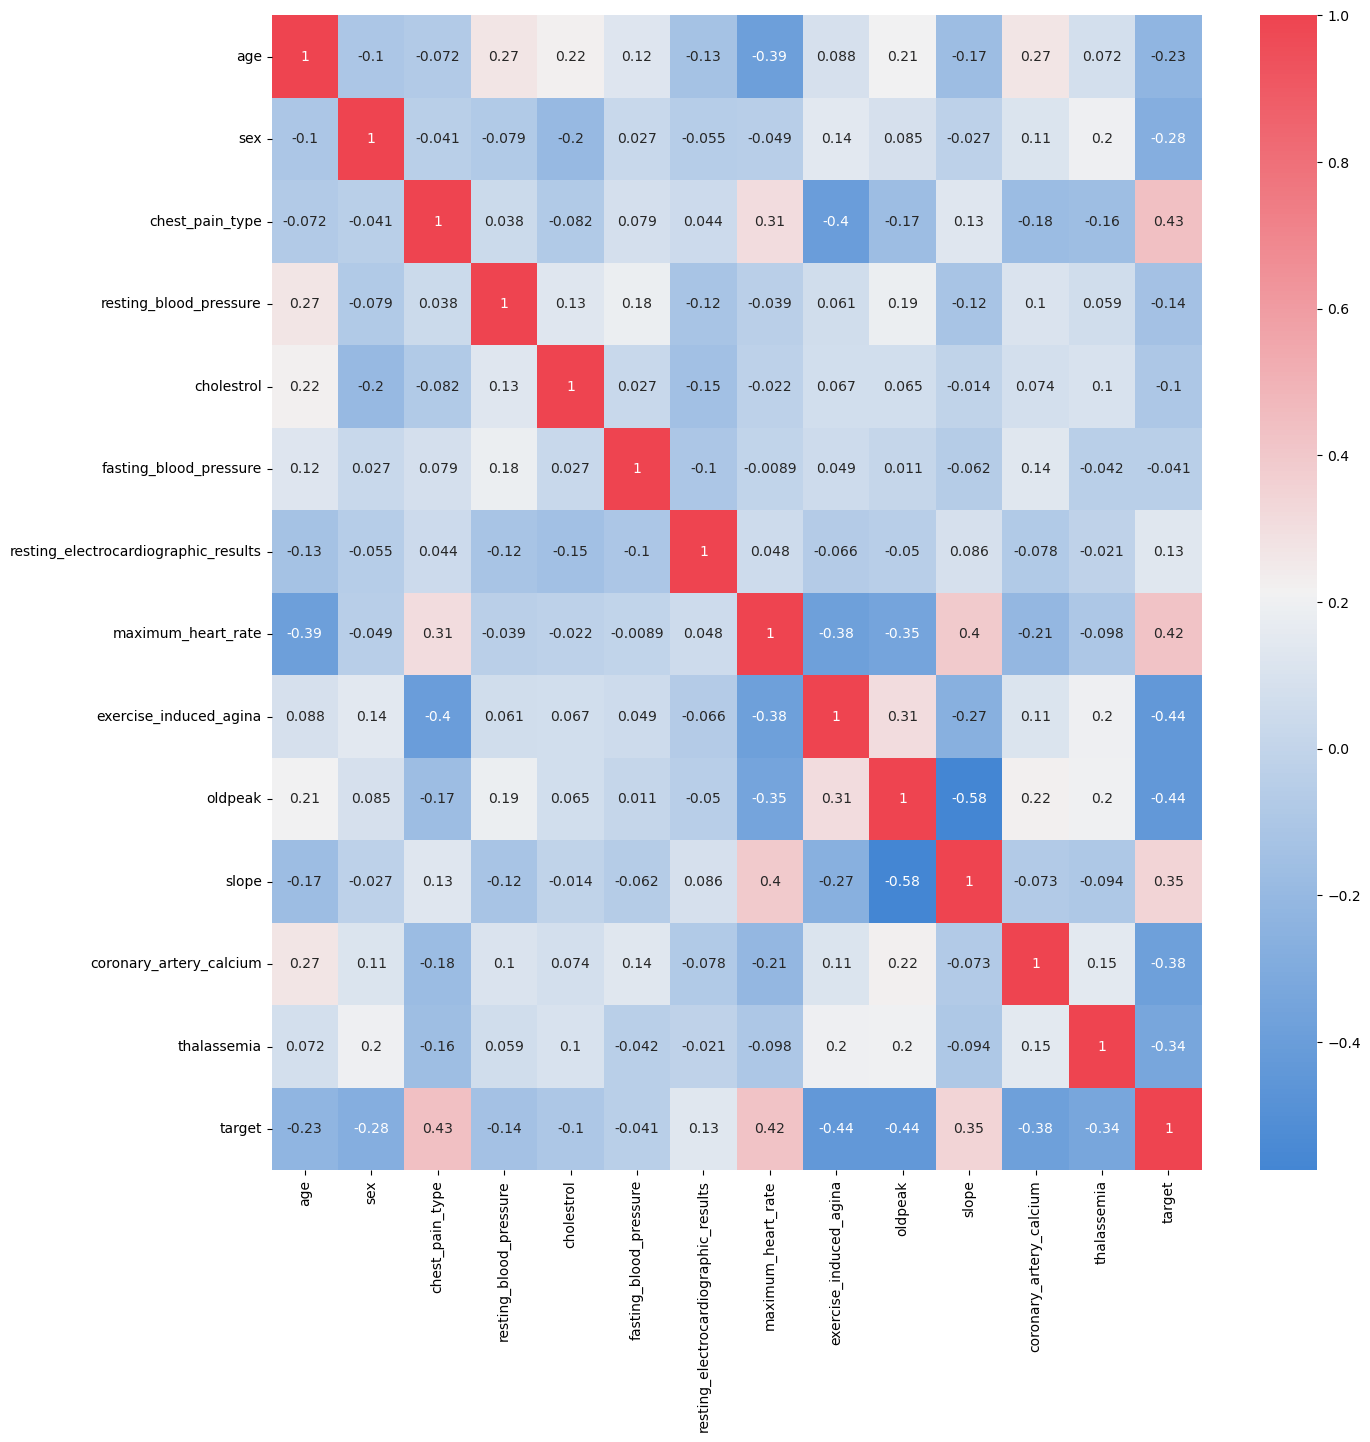

In [10]:
correlation=data.corr()
plt.figure(figsize=(15,15))
cmap=sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(correlation,annot=True,cmap=cmap)
plt.show()

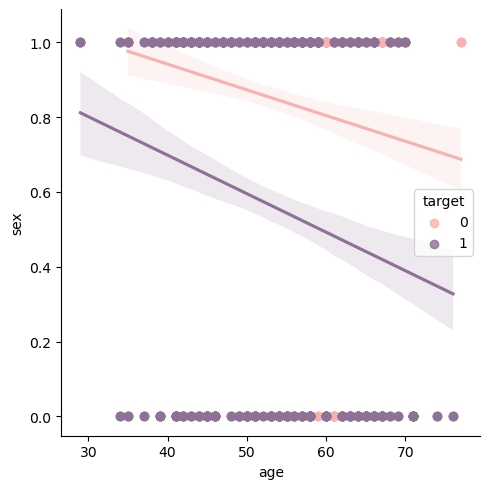

In [11]:
sns.lmplot(data=data,x='age',y='sex',hue='target',palette=colours,legend_out=False)
plt.show()

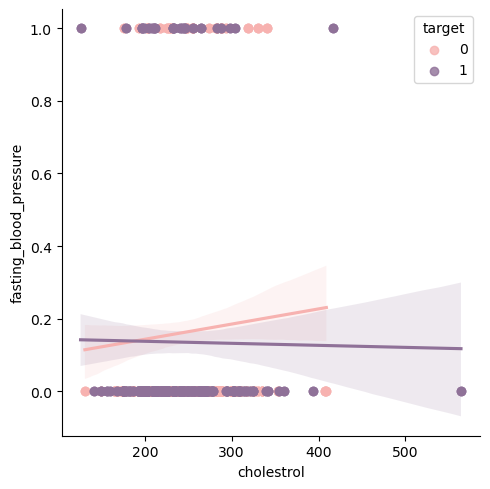

In [12]:
sns.lmplot(data=data,x='cholestrol',y='fasting_blood_pressure',hue='target',palette=colours,legend_out=False)
plt.show()

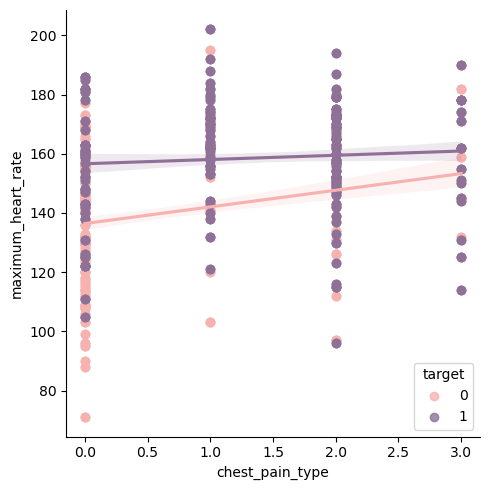

In [13]:
sns.lmplot(data=data,x='chest_pain_type',y='maximum_heart_rate',hue='target',palette=colours,legend_out=False)
plt.show()

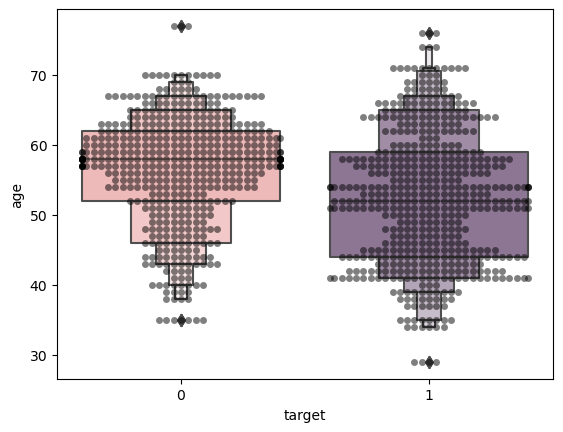

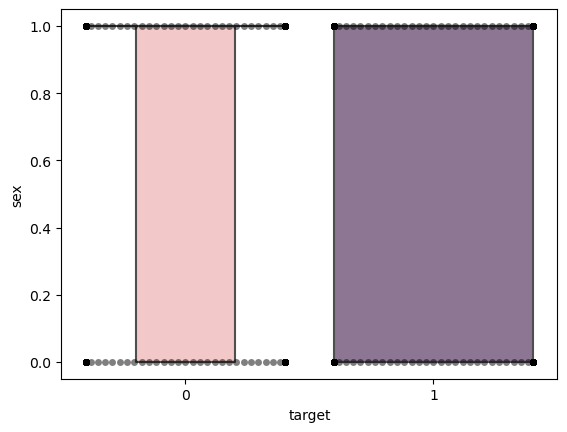

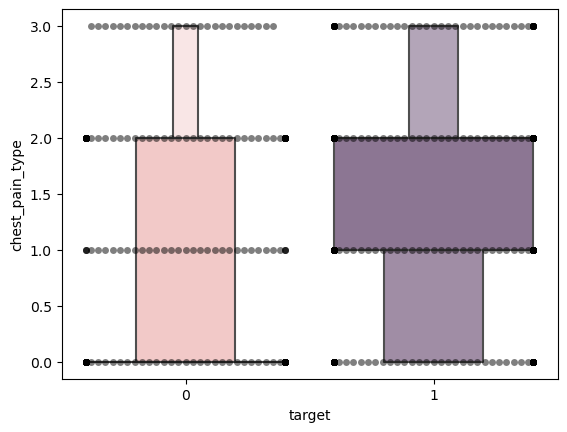

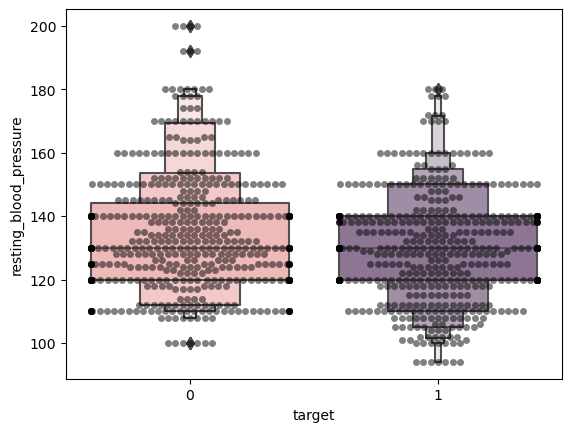

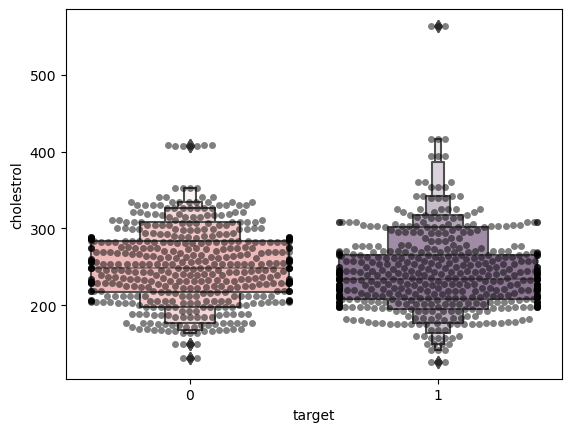

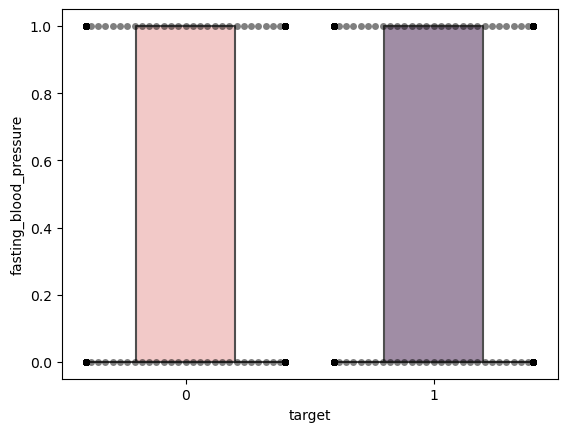

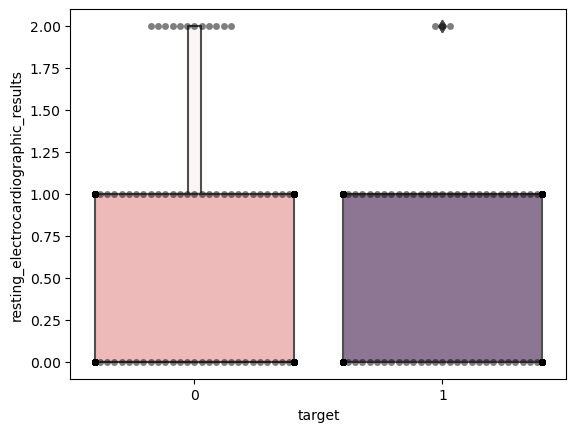

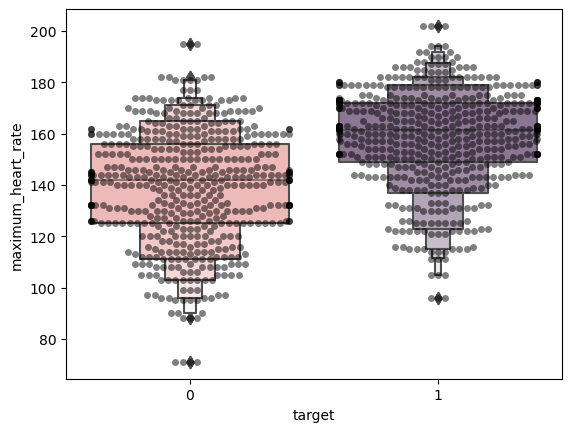

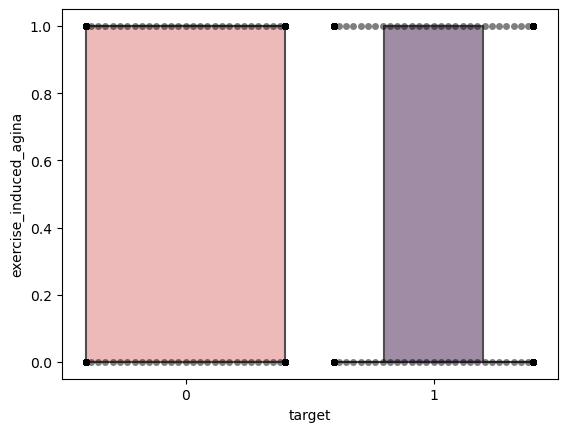

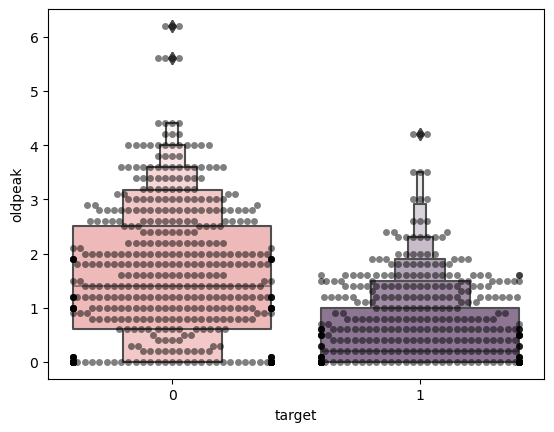

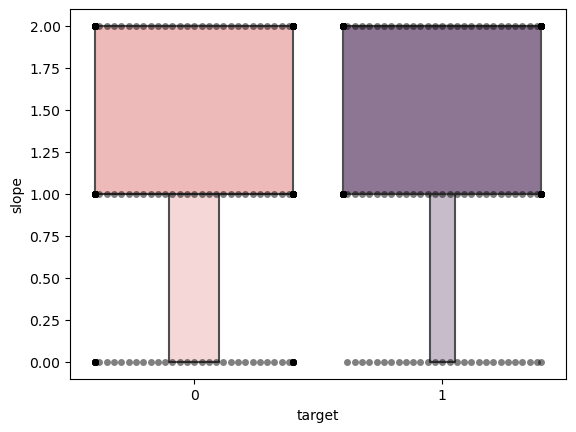

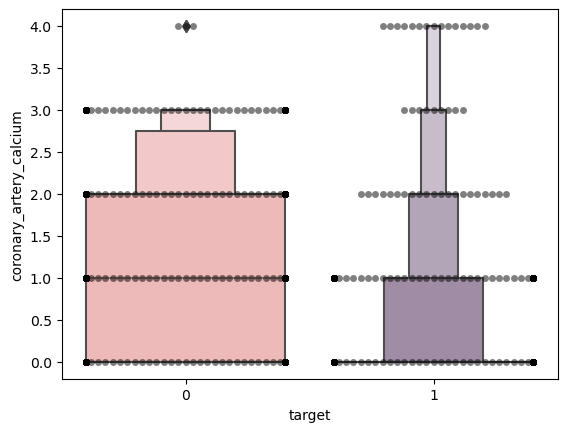

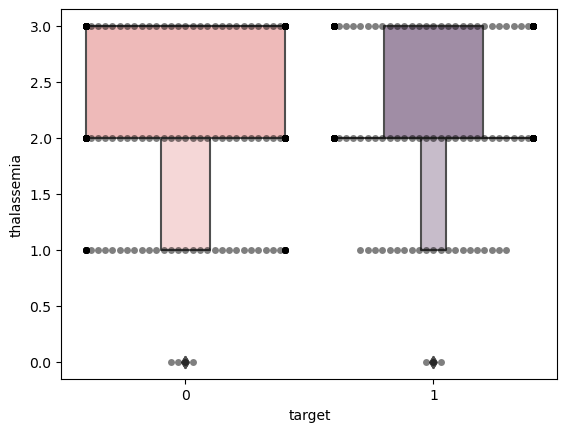

In [14]:
features=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_pressure', 'resting_electrocardiographic_results',
       'maximum_heart_rate', 'exercise_induced_agina', 'oldpeak', 'slope',
       'coronary_artery_calcium', 'thalassemia']
for i in features:
  sns.swarmplot(x=data['target'],y=data[i],color='black',alpha=0.5)
  sns.boxenplot(x=data['target'],y=data[i],palette=colours)
  plt.show()

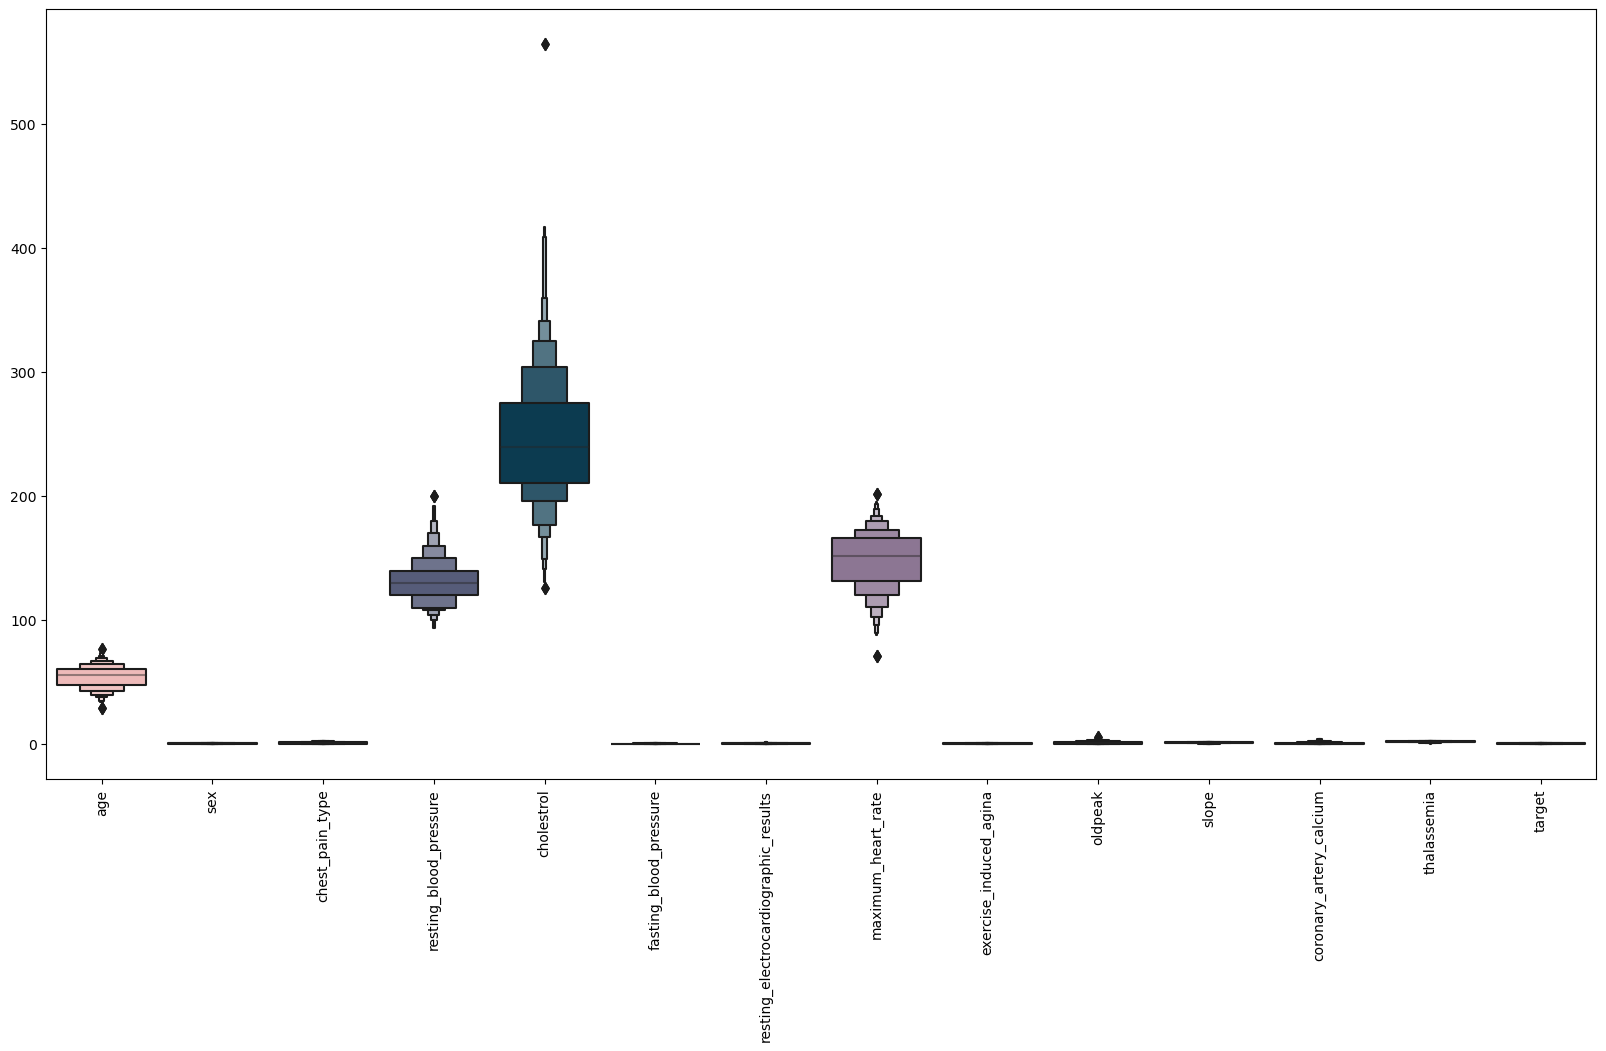

In [15]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data,palette=shades)
plt.xticks(rotation=90)
plt.show()

In [16]:
x=data.drop(['target'],axis=1)
y=data[['target']]
print(x.shape)
print(y.shape)

(1025, 13)
(1025, 1)


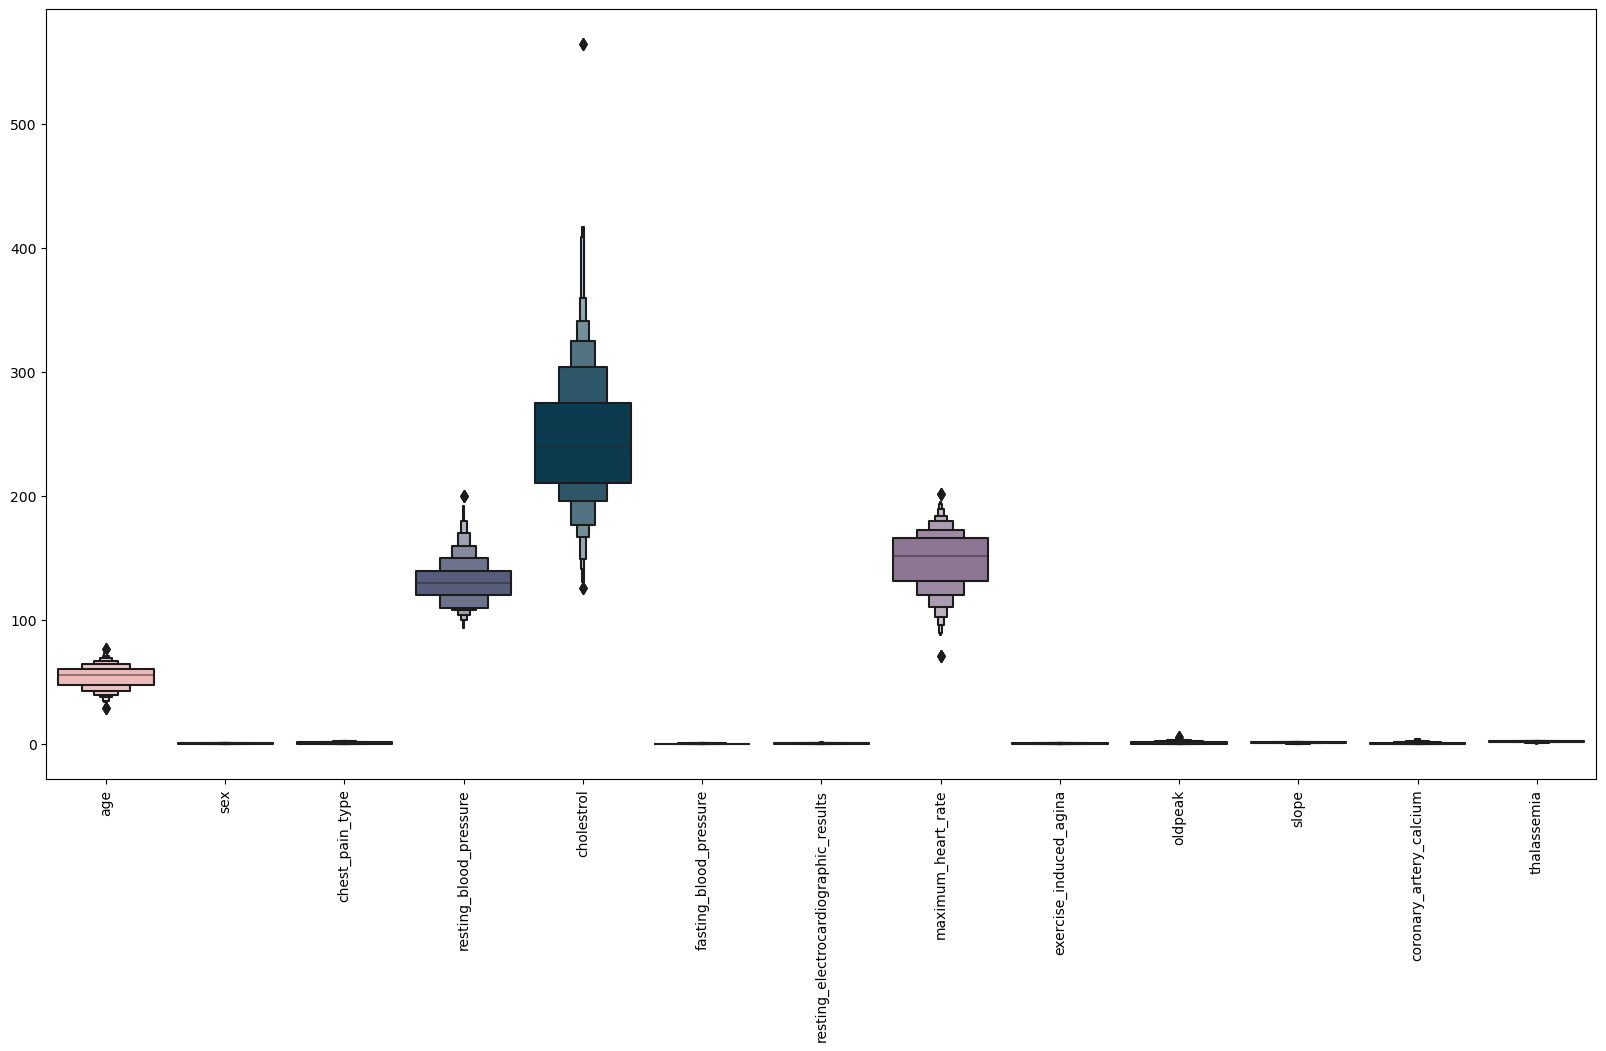

In [17]:
plt.figure(figsize=(20,10))
sns.boxenplot(x,palette=shades)
plt.xticks(rotation=90)
plt.show()

# FEATURE ENGINEERING

In [18]:
MS=MinMaxScaler()
col=x.columns
x[col]=MS.fit_transform(x[col])
x

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [19]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


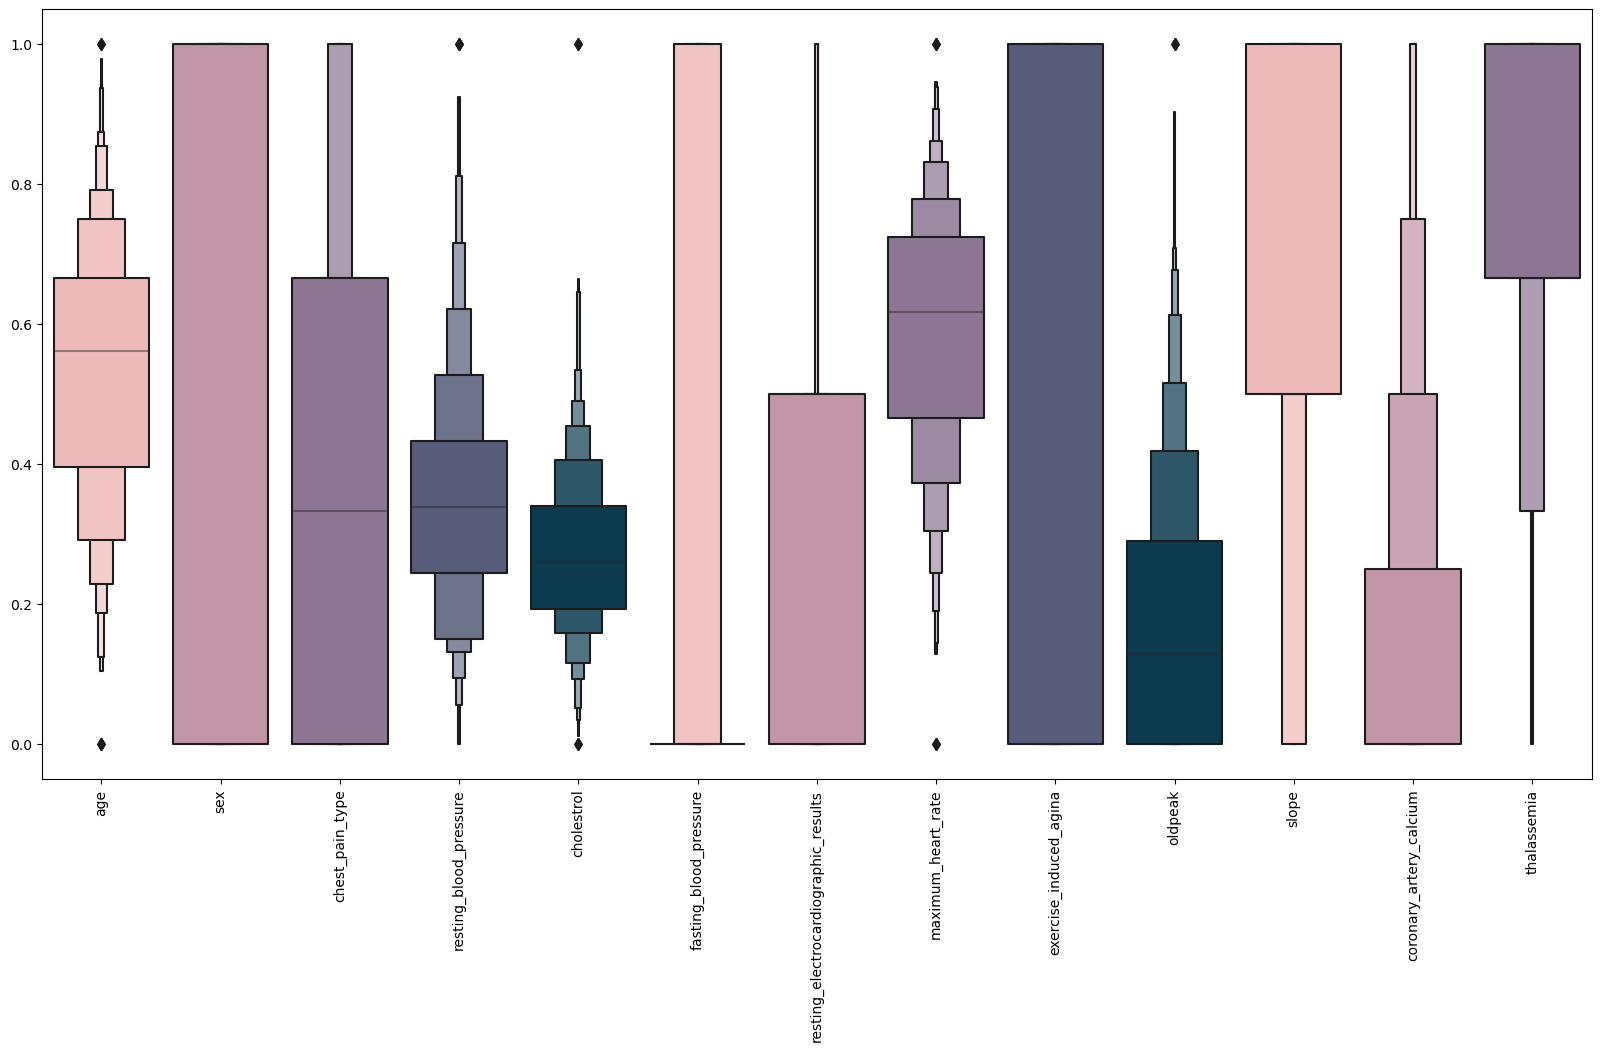

In [20]:
plt.figure(figsize=(20,10))
sns.boxenplot(x,palette=shades)
plt.xticks(rotation=90)
plt.show()

# DATA SPLITTING

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [22]:
x_train.shape,y_train.shape

((717, 13), (717, 1))

In [23]:
x_test.shape,y_test.shape

((308, 13), (308, 1))

In [24]:
x_train

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia
497,0.583333,1.0,0.333333,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,1.0,0.25,0.666667
578,0.687500,0.0,0.000000,0.433962,0.611872,0.0,0.0,0.656489,0.0,0.193548,0.5,0.00,0.666667
891,0.729167,0.0,0.000000,0.811321,0.454338,0.0,0.5,0.633588,1.0,0.000000,1.0,0.00,0.666667
582,0.541667,1.0,0.333333,0.339623,0.310502,0.0,0.5,0.641221,0.0,0.000000,1.0,0.00,0.666667
491,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.708333,0.0,0.333333,0.433962,0.157534,0.0,0.5,0.824427,0.0,0.000000,1.0,0.50,0.666667
367,0.395833,1.0,0.333333,0.150943,0.235160,0.0,0.5,0.740458,0.0,0.161290,0.0,0.00,1.000000
393,0.687500,0.0,0.000000,0.622642,0.086758,0.0,0.0,0.564885,0.0,1.000000,0.0,0.75,1.000000
777,0.500000,1.0,0.000000,0.273585,0.356164,0.0,0.5,0.183206,1.0,0.322581,0.5,0.50,1.000000


In [25]:
x_test

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia
289,0.229167,1.0,0.000000,0.547170,0.221461,0.0,0.5,0.839695,0.0,0.000000,1.0,0.00,1.000000
428,0.291667,1.0,0.000000,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,0.5,1.00,1.000000
138,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667
262,0.395833,1.0,0.000000,0.264151,0.219178,0.0,0.0,0.877863,0.0,0.000000,1.0,0.00,0.666667
457,0.208333,0.0,0.666667,0.415094,0.214612,0.0,0.5,0.618321,0.0,0.000000,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.333333,1.0,0.000000,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667
200,0.687500,0.0,0.000000,0.283019,0.189498,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
517,0.250000,0.0,0.333333,0.103774,0.164384,0.0,0.5,0.740458,0.0,0.000000,1.0,0.25,0.666667
88,0.687500,0.0,0.000000,0.433962,0.324201,0.0,0.0,0.679389,0.0,0.580645,0.0,0.50,0.666667


In [26]:
y_train

,target
497,0
578,1
891,1
582,1
491,1
...,...
693,1
367,0
393,0
777,0


In [27]:
y_test

,target
289,0
428,0
138,1
262,1
457,1
...,...
913,1
200,1
517,1
88,0


# MODEL SELECTION

In [28]:
pipe = Pipeline([('DT', (DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0))), ('svc', SVC(kernel='rbf',degree=3,gamma='scale')),('RF',RandomForestClassifier(criterion='gini',max_depth=3,random_state=0)),('LR',LogisticRegression(solver='liblinear'))])
models=["DECISION TREE","SVC","RANDOM FOREST",'LOGISTIC REGRESSION']

# MODEL TRAINING,PREDICTION AND EVALUATION

DECISION TREE

 classification report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       150
           1       0.84      0.87      0.85       158

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

train data score 0.8368200836820083

 accuracy score 0.8474025974025974


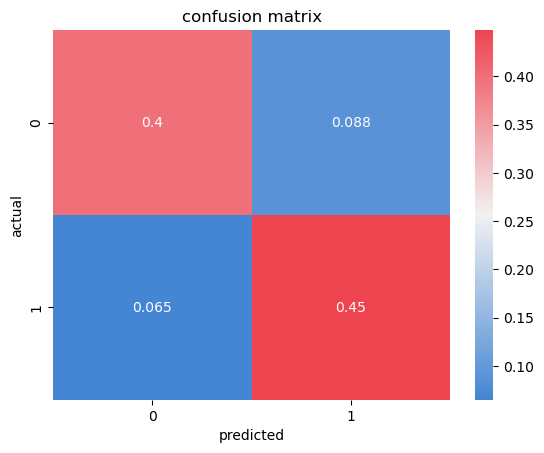

SVC

 classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       150
           1       0.89      0.89      0.89       158

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

train data score 0.9065550906555091

 accuracy score 0.8863636363636364


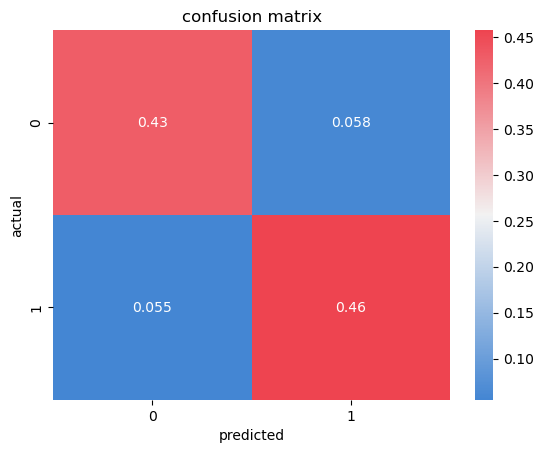

RANDOM FOREST

 classification report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       150
           1       0.89      0.91      0.90       158

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

train data score 0.8926080892608089

 accuracy score 0.8928571428571429


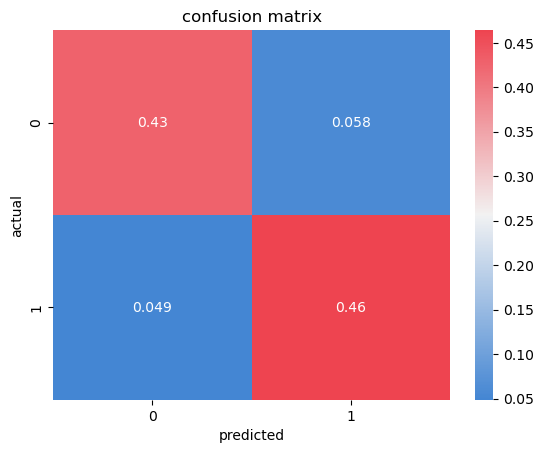

LOGISTIC REGRESSION

 classification report
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       150
           1       0.80      0.89      0.84       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308

train data score 0.8535564853556485

 accuracy score 0.8246753246753247


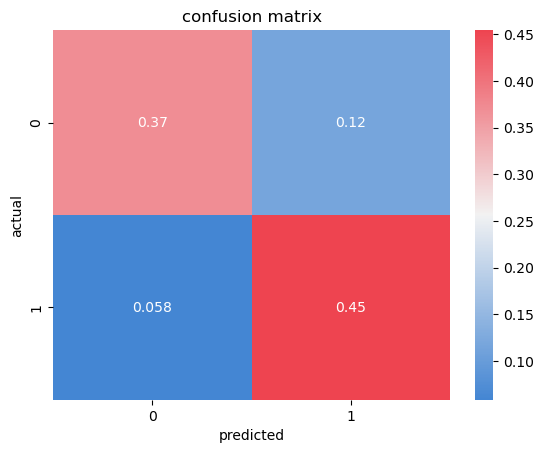

In [29]:
for x,pipes in enumerate(pipe):
 pipes.fit(x_train,y_train)
 predict=pipes.predict(x_test)
 print(models[x])
 print('\n','classification report\n',classification_report(y_test,predict))
 print('train data score',pipes.score(x_train,y_train))
 print('\n','accuracy score',accuracy_score(y_test,predict))
 plt.subplots(1,1)
 con=confusion_matrix(y_test,predict)
 sns.heatmap(con/np.sum(con),annot=True,cmap=cmap)
 plt.title('confusion matrix')
 plt.xlabel('predicted')
 plt.ylabel('actual')   
 plt.show()

# OBJECT CREATION

In [30]:
# Random Forest Has been taken Since It Gives more Accuracy
ada = AdaBoostClassifier(RandomForestClassifier(criterion='gini',max_depth=3,random_state=0),n_estimators=100, random_state=0)
ada.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=100, random_state=0)

In [31]:
prediction=ada.predict(x_test)

In [32]:
print(accuracy_score(y_test,prediction))

0.9902597402597403


In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



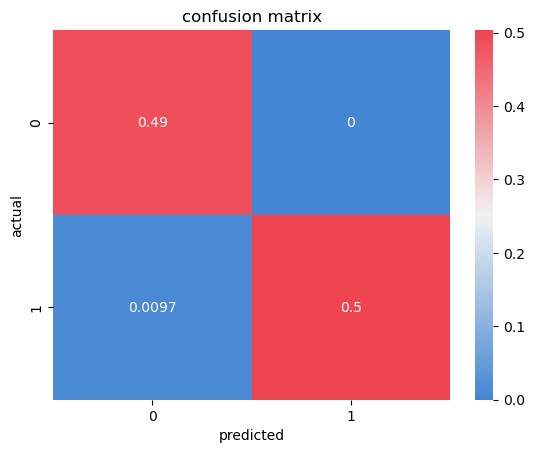

In [34]:
con=confusion_matrix(y_test,prediction)
sns.heatmap(con/np.sum(con),annot=True,cmap=cmap)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()